In [1]:
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')
import numpy as np
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, auc
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.feature_selection import RFE
import itertools
from xgboost import XGBClassifier
from tabulate import tabulate
pd.set_option('display.max_columns', None)

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# List the paths of the CSV files you want to combine
file_paths = ['E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00026-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00027-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00028-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00029-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv']#,'E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00030-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00031-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00032-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv']

# Read the CSV files into individual DataFrames
dataframes = [spark.read.csv(file_path, header=True, inferSchema=True) for file_path in file_paths]

# Combine the DataFrames into a single DataFrame
combined1_df = dataframes[0]
for df in dataframes[1:]:
    combined1_df = combined1_df.union(df)

# Write the combined DataFrame to a single CSV file
output_path = 'combined1_file.csv'
combined1_df.coalesce(1).write.csv(output_path, header=True, mode='overwrite')


In [3]:
df = pd.read_csv(r"C:\Users\nvnS\combined1_file.csv\part-00000-c163de23-8d97-403c-ad89-dbd39f3e53e9-c000.csv")
df

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,0.0,1.0,64.00,64.720921,64.720921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.0,42.0,42.000000,0.000000,42.00,8.312869e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
1,5.432061,108.0,6.0,64.00,0.368185,0.368185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.0,54.0,54.000000,0.000000,54.00,8.307603e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-TCP_Flood
2,0.000000,0.0,47.0,64.00,16.684351,16.684351,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6216.00,592.0,592.0,592.000000,0.000000,592.00,8.367732e+07,9.5,34.409301,0.000000,0.000000,0.00,141.55,Mirai-greeth_flood
3,0.000000,0.0,1.0,64.00,390.549281,390.549281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.0,42.0,42.000000,0.000000,42.00,8.312465e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
4,201.455203,10425.1,6.0,62.40,15.125390,15.125390,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.6,0.0,24.4,50.3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2554.00,46.0,1494.0,168.122456,353.669152,75.30,1.668479e+08,13.5,18.321588,501.283813,126560.122297,1.00,244.60,Recon-HostDiscovery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960062,0.000000,54.0,6.0,64.00,13.160665,13.160665,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.0,54.0,54.000000,0.000000,54.00,8.333126e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-PSHACK_Flood
960063,0.233475,17453.7,17.0,67.82,30034.276124,30034.276124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,550.08,50.0,71.0,51.694067,5.231095,52.46,8.301637e+07,9.5,10.157898,7.413133,264.972492,0.12,141.55,DoS-UDP_Flood
960064,0.000000,54.0,6.0,64.00,0.953451,0.953451,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.0,54.0,54.000000,0.000000,54.00,8.333178e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-PSHACK_Flood
960065,0.000000,54.0,6.0,64.00,14.870483,14.870483,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.0,54.0,54.000000,0.000000,54.00,8.334401e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood


In [4]:
df['label'].value_counts()

DDoS-ICMP_Flood            148222
DDoS-UDP_Flood             111825
DDoS-TCP_Flood              91825
DDoS-PSHACK_Flood           84146
DDoS-SYN_Flood              83639
DDoS-RSTFINFlood            83115
DDoS-SynonymousIP_Flood     73727
DoS-UDP_Flood               68207
DoS-TCP_Flood               54994
DoS-SYN_Flood               41788
BenignTraffic               22725
Mirai-greeth_flood          20400
Mirai-udpplain              18304
Mirai-greip_flood           15581
DDoS-ICMP_Fragmentation      9157
MITM-ArpSpoofing             6302
DDoS-ACK_Fragmentation       5998
DDoS-UDP_Fragmentation       5896
DNS_Spoofing                 3751
Recon-HostDiscovery          2693
Recon-OSScan                 1992
Recon-PortScan               1708
DoS-HTTP_Flood               1524
VulnerabilityScan             712
DDoS-HTTP_Flood               562
DDoS-SlowLoris                481
DictionaryBruteForce          265
BrowserHijacking              122
CommandInjection              110
SqlInjection  

In [5]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

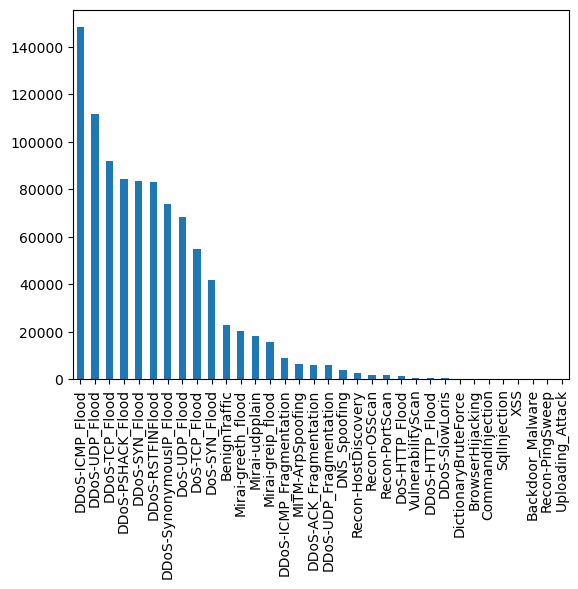

In [6]:
bar_graph('label')

In [7]:
df['label'].unique()

array(['DDoS-ICMP_Flood', 'DDoS-TCP_Flood', 'Mirai-greeth_flood',
       'Recon-HostDiscovery', 'DDoS-UDP_Fragmentation', 'DoS-TCP_Flood',
       'DoS-SYN_Flood', 'DDoS-SYN_Flood', 'DDoS-UDP_Flood',
       'DDoS-PSHACK_Flood', 'DDoS-RSTFINFlood', 'Mirai-udpplain',
       'BenignTraffic', 'DoS-UDP_Flood', 'Mirai-greip_flood',
       'DDoS-SynonymousIP_Flood', 'MITM-ArpSpoofing', 'DoS-HTTP_Flood',
       'DDoS-ACK_Fragmentation', 'DDoS-ICMP_Fragmentation',
       'DNS_Spoofing', 'Recon-OSScan', 'DictionaryBruteForce',
       'BrowserHijacking', 'VulnerabilityScan', 'Recon-PortScan',
       'DDoS-SlowLoris', 'DDoS-HTTP_Flood', 'Backdoor_Malware',
       'CommandInjection', 'SqlInjection', 'Recon-PingSweep',
       'Uploading_Attack', 'XSS'], dtype=object)

In [8]:
#encoding categorical data
from sklearn.preprocessing import LabelEncoder

enc=LabelEncoder()
df['label']=enc.fit_transform(df['label'])
df

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,0.0,1.0,64.00,64.720921,64.720921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.0,42.0,42.000000,0.000000,42.00,8.312869e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,6
1,5.432061,108.0,6.0,64.00,0.368185,0.368185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.0,54.0,54.000000,0.000000,54.00,8.307603e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,13
2,0.000000,0.0,47.0,64.00,16.684351,16.684351,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6216.00,592.0,592.0,592.000000,0.000000,592.00,8.367732e+07,9.5,34.409301,0.000000,0.000000,0.00,141.55,23
3,0.000000,0.0,1.0,64.00,390.549281,390.549281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.0,42.0,42.000000,0.000000,42.00,8.312465e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,6
4,201.455203,10425.1,6.0,62.40,15.125390,15.125390,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.6,0.0,24.4,50.3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2554.00,46.0,1494.0,168.122456,353.669152,75.30,1.668479e+08,13.5,18.321588,501.283813,126560.122297,1.00,244.60,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960062,0.000000,54.0,6.0,64.00,13.160665,13.160665,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.0,54.0,54.000000,0.000000,54.00,8.333126e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,8
960063,0.233475,17453.7,17.0,67.82,30034.276124,30034.276124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,550.08,50.0,71.0,51.694067,5.231095,52.46,8.301637e+07,9.5,10.157898,7.413133,264.972492,0.12,141.55,21
960064,0.000000,54.0,6.0,64.00,0.953451,0.953451,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.0,54.0,54.000000,0.000000,54.00,8.333178e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,8
960065,0.000000,54.0,6.0,64.00,14.870483,14.870483,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.0,54.0,54.000000,0.000000,54.00,8.334401e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,9


In [9]:
x=df.drop(columns=['label'])
y=df['label']

In [10]:
y

0          6
1         13
2         23
3          6
4         26
          ..
960062     8
960063    21
960064     8
960065     9
960066    14
Name: label, Length: 960067, dtype: int32

In [11]:
#splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [12]:
x_train

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
817544,0.000000,54.00,6.00,64.00,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.00,0.0,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.00,54.00,54.000000,0.000000,54.00,8.334860e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55
53177,4.104353,5057743.00,17.00,64.00,2224.341633,2224.341633,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,5817.00,554.00,554.00,554.000000,0.000000,554.00,8.378902e+07,9.5,33.286634,0.000000,0.000000,0.00,141.55
627280,0.000849,181.57,16.89,65.91,24.558248,24.558248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.01,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1901.30,172.30,182.00,181.351292,2.410427,181.03,8.300370e+07,9.5,19.044326,3.416201,58.781541,0.10,141.55
299139,0.000000,54.00,6.00,64.00,1.028211,1.028211,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.00,0.0,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.00,54.00,54.000000,0.000000,54.00,8.334922e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55
539904,3.428530,162.00,6.00,64.00,0.922573,0.922573,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,3.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.00,54.00,54.000000,0.000000,54.00,8.336549e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882371,0.000000,0.00,1.00,64.00,307.590496,307.590496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.00,42.00,42.000000,0.000000,42.00,8.315010e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55
152315,0.068860,36275.00,17.00,64.00,57314.866299,57314.866299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.00,50.00,50.00,50.000000,0.000000,50.00,8.310287e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55
117952,0.000000,54.00,6.00,64.00,2.032570,2.032570,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.00,0.0,0.0,1.00,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.00,54.00,54.000000,0.000000,54.00,8.331814e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55
435829,0.199351,6517.08,12.57,116.16,24940.511659,24940.511659,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,574.36,51.52,56.00,54.296750,1.649573,55.64,8.301549e+07,9.5,10.398594,2.334231,11.487583,0.28,141.55


In [13]:
y_train

817544     9
53177     25
627280    21
299139     9
539904    12
          ..
882371     6
152315    14
117952     8
435829    21
305711    25
Name: label, Length: 768053, dtype: int32

In [14]:
print("Training set:", len(x_train))
print("Testing set:", len(x_test))

Training set: 768053
Testing set: 192014


In [15]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [16]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train,y_train)

log_acc=clf.score(x_test,y_test)
pred=clf.predict(x_test)

log_prec=precision_score(y_test,pred,average='weighted')
log_rec=recall_score(y_test,pred,average='weighted')
log_f1=f1_score(y_test,pred,average='weighted')

print('accuracy:',log_acc)
print('precision:', log_prec)
print('recall: ', log_rec)
print('f1: ', log_f1)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy: 0.801228035455748
precision: 0.809439428677119
recall:  0.801228035455748
f1:  0.7663413664561038


In [17]:
from sklearn.ensemble import RandomForestClassifier
clf1=RandomForestClassifier(n_estimators=100)
clf1.fit(x_train,y_train)
rf_acc=clf1.score(x_test,y_test)
pred=clf1.predict(x_test)

rf_prec=precision_score(y_test,pred,average='weighted')
rf_rec=recall_score(y_test,pred,average='weighted')
rf_f1=f1_score(y_test,pred,average='weighted')

print('accuracy:',rf_acc)
print('precision:', rf_prec)
print('recall: ', rf_rec)
print('f1: ', rf_f1)

accuracy: 0.9929067672148906
precision: 0.9926460595923811
recall:  0.9929067672148906
f1:  0.9923456694145278


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
from sklearn.ensemble import AdaBoostClassifier

clf2=AdaBoostClassifier()
clf2.fit(x_train,y_train)
ada_acc=clf2.score(x_test,y_test)
pred=clf2.predict(x_test)

ada_prec=precision_score(y_test,pred,average='weighted')
ada_rec=recall_score(y_test,pred,average='weighted')
ada_f1=f1_score(y_test,pred,average='weighted')

print('accuracy:',ada_acc)
print('precision:', ada_prec)
print('recall: ', ada_rec)
print('f1: ', ada_f1)

accuracy: 0.6213869821992146
precision: 0.6322798291733712
recall:  0.6213869821992146
f1:  0.5369284038126219


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf3=GradientBoostingClassifier()
clf3.fit(x_train,y_train)
print('accuracy', clf3.score(x_test,y_test))

pred=clf3.predict(x_test)

print('precision: ', precision_score(y_test,pred,average='weighted'))
print('recall: ', recall_score(y_test,pred,average='weighted'))
print('f1:', f1_score(y_test,pred,average='weighted'))

# neural network

In [19]:
from tensorflow.keras.layers import Input, Dense 
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Dropout,SimpleRNN,Input,GRU
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint, CSVLogger
from keras.utils.np_utils import to_categorical


In [20]:
Y = to_categorical(y)
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [21]:
#splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size = 0.2, random_state = 42, stratify=Y)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(768053, 46)
(768053, 34)
(192014, 46)
(192014, 34)


In [22]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [23]:

input_=Input(shape=(x_train.shape[1],))
d=Dense(100, activation='relu')(input_)
d=Dense(100, activation='relu') (d)
d=Dense(100, activation='relu') (d)
d=Dense(100, activation='relu') (d)
d=Dense(100, activation='relu') (d)
d=Dense(100, activation='relu') (d)
output = Dense(34, activation='softmax')(d)

model = Model(inputs=input_, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 46)]              0         
                                                                 
 dense (Dense)               (None, 100)               4700      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               10100 

In [24]:
#callbacks: checkpoint, csv_logger
filepath="nn.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
csv_log=CSVLogger('nn_log.csv',separator=',',append=False)
callbacks_list=[checkpoint,csv_log]

history=model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2, callbacks=callbacks_list)

Epoch 1/20
9599/9601 [============================>.] - ETA: 0s - loss: 0.4205 - accuracy: 0.8154
Epoch 1: val_accuracy improved from -inf to 0.89830, saving model to nn.hdf5
9601/9601 [==============================] - 18s 2ms/step - loss: 0.4204 - accuracy: 0.8154 - val_loss: 0.2739 - val_accuracy: 0.8983
Epoch 2/20
9571/9601 [============================>.] - ETA: 0s - loss: 0.1678 - accuracy: 0.9342
Epoch 2: val_accuracy improved from 0.89830 to 0.95477, saving model to nn.hdf5
9601/9601 [==============================] - 17s 2ms/step - loss: 0.1676 - accuracy: 0.9343 - val_loss: 0.1178 - val_accuracy: 0.9548
Epoch 3/20
9579/9601 [============================>.] - ETA: 0s - loss: 0.1169 - accuracy: 0.9546
Epoch 3: val_accuracy improved from 0.95477 to 0.95844, saving model to nn.hdf5
9601/9601 [==============================] - 17s 2ms/step - loss: 0.1169 - accuracy: 0.9546 - val_loss: 0.1364 - val_accuracy: 0.9584
Epoch 4/20
9574/9601 [============================>.] - ETA: 0s - l

Text(0, 0.5, 'accuracy')

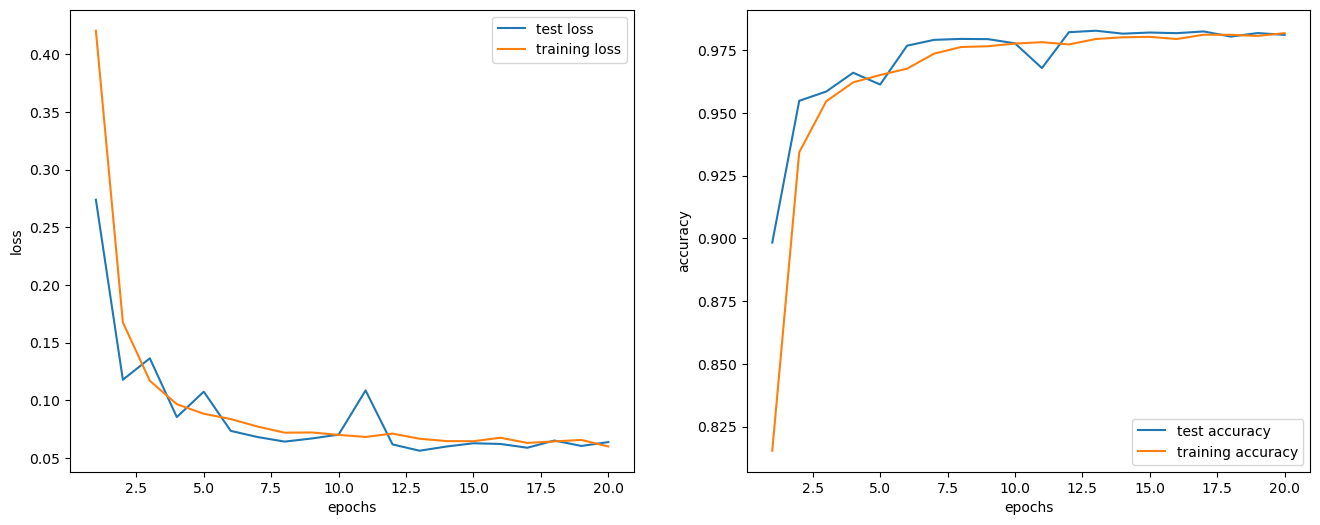

In [25]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.plot(np.arange(1,21,1),history.history['val_loss'], label='test loss')
plt.plot(np.arange(1,21,1),history.history['loss'], label='training loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')

plt.subplot(1,2,2)
plt.plot(np.arange(1,21,1),history.history['val_accuracy'], label='test accuracy')
plt.plot(np.arange(1,21,1),history.history['accuracy'], label='training accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')

In [26]:
#load the best model
dnn=load_model('nn.hdf5')

#getting the probabilities
pred=dnn.predict(x_test)
pred
dnn_pred=pred.argmax(axis=1)
y_test1=y_test.argmax(axis=1)
accuracy_score(y_test.argmax(axis=1),pred.argmax(axis=1))
print('Precision score: ',precision_score(y_test1, dnn_pred, average='weighted'))
print('Recall score: ',recall_score(y_test1, dnn_pred,average='weighted'))
print('F1 score: ',f1_score(y_test1, dnn_pred,average='weighted'))

6001/6001 [==============================] - 5s 780us/step
Precision score:  0.9807940120074793
Recall score:  0.9823971168768943
F1 score:  0.9809847569732452


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
